# Chapter 9: How to analyze time-series data

In [1]:
import pandas as pd
import seaborn as sns

## How to generate time periods

In [2]:
pd.date_range('01/01/2020','12/31/2020', freq='MS')

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [3]:
pd.date_range('01/01/2020', '01/31/2020', freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31'],
              dtype='datetime64[ns]', freq='B')

In [4]:
pd.date_range('12/01/2020', '12/31/2020', freq='W-MON')

DatetimeIndex(['2020-12-07', '2020-12-14', '2020-12-21', '2020-12-28'], dtype='datetime64[ns]', freq='W-MON')

In [5]:
pd.date_range('01/01/2020', '01/31/2020', freq='12h')

C:\Users\Scott\AppData\Local\Temp\ipykernel_18692\3043353117.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('01/01/2020', '01/31/2020', freq='12H')


DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 12:00:00',
               '2020-01-02 00:00:00', '2020-01-02 12:00:00',
               '2020-01-03 00:00:00', '2020-01-03 12:00:00',
               '2020-01-04 00:00:00', '2020-01-04 12:00:00',
               '2020-01-05 00:00:00', '2020-01-05 12:00:00',
               '2020-01-06 00:00:00', '2020-01-06 12:00:00',
               '2020-01-07 00:00:00', '2020-01-07 12:00:00',
               '2020-01-08 00:00:00', '2020-01-08 12:00:00',
               '2020-01-09 00:00:00', '2020-01-09 12:00:00',
               '2020-01-10 00:00:00', '2020-01-10 12:00:00',
               '2020-01-11 00:00:00', '2020-01-11 12:00:00',
               '2020-01-12 00:00:00', '2020-01-12 12:00:00',
               '2020-01-13 00:00:00', '2020-01-13 12:00:00',
               '2020-01-14 00:00:00', '2020-01-14 12:00:00',
               '2020-01-15 00:00:00', '2020-01-15 12:00:00',
               '2020-01-16 00:00:00', '2020-01-16 12:00:00',
               '2020-01-

## How to reindex with datetime indexes

In [6]:
# get stock data
stockData = pd.read_csv('AAPL.csv', usecols=['Date','Open','High','Low','Close'], 
                        parse_dates=['Date'])

In [7]:
stockData = stockData.set_index('Date')
stockData.head(3)

,Open,High,Low,Close
Date,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502
2020-01-03,74.287498,75.144997,74.125000,74.357498
2020-01-06,73.447502,74.989998,73.187500,74.949997


In [8]:
fridays = pd.date_range('01/01/2020', '12/31/2020', freq='W-FRI')
fridays

DatetimeIndex(['2020-01-03', '2020-01-10', '2020-01-17', '2020-01-24',
               '2020-01-31', '2020-02-07', '2020-02-14', '2020-02-21',
               '2020-02-28', '2020-03-06', '2020-03-13', '2020-03-20',
               '2020-03-27', '2020-04-03', '2020-04-10', '2020-04-17',
               '2020-04-24', '2020-05-01', '2020-05-08', '2020-05-15',
               '2020-05-22', '2020-05-29', '2020-06-05', '2020-06-12',
               '2020-06-19', '2020-06-26', '2020-07-03', '2020-07-10',
               '2020-07-17', '2020-07-24', '2020-07-31', '2020-08-07',
               '2020-08-14', '2020-08-21', '2020-08-28', '2020-09-04',
               '2020-09-11', '2020-09-18', '2020-09-25', '2020-10-02',
               '2020-10-09', '2020-10-16', '2020-10-23', '2020-10-30',
               '2020-11-06', '2020-11-13', '2020-11-20', '2020-11-27',
               '2020-12-04', '2020-12-11', '2020-12-18', '2020-12-25'],
              dtype='datetime64[ns]', freq='W-FRI')

In [9]:
stockData.reindex(fridays).head(3)

,Open,High,Low,Close
2020-01-03,74.287498,75.144997,74.1250,74.357498
2020-01-10,77.650002,78.167503,77.0625,77.582497
2020-01-17,79.067497,79.684998,78.7500,79.682503


## How to reindex with a semi-month index

In [10]:
semiMonths = pd.date_range('01/01/2020', '12/31/2020', freq='SMS')
semiMonths

DatetimeIndex(['2020-01-01', '2020-01-15', '2020-02-01', '2020-02-15',
               '2020-03-01', '2020-03-15', '2020-04-01', '2020-04-15',
               '2020-05-01', '2020-05-15', '2020-06-01', '2020-06-15',
               '2020-07-01', '2020-07-15', '2020-08-01', '2020-08-15',
               '2020-09-01', '2020-09-15', '2020-10-01', '2020-10-15',
               '2020-11-01', '2020-11-15', '2020-12-01', '2020-12-15'],
              dtype='datetime64[ns]', freq='SMS-15')

In [11]:
stockData.reindex(semiMonths).head()

,Open,High,Low,Close
2020-01-01,NaN,NaN,NaN,NaN
2020-01-15,77.962502,78.875,77.387497,77.834999
2020-02-01,NaN,NaN,NaN,NaN
2020-02-15,NaN,NaN,NaN,NaN
2020-03-01,NaN,NaN,NaN,NaN


<Axes: >

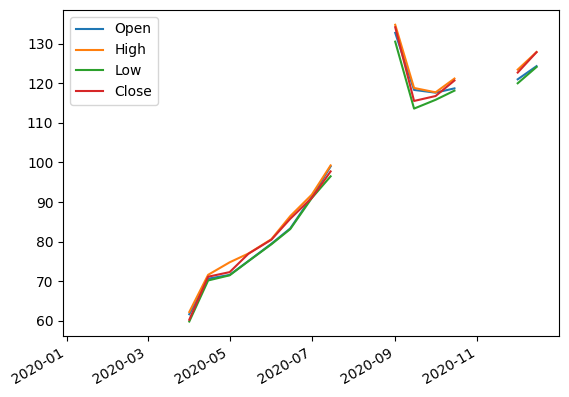

In [12]:
stockData.reindex(semiMonths).plot()

## How a user-defined function can improve a datetime index

In [13]:
import datetime as dt

def adjustDate(date):
    if date.weekday() < 5:
        return date
    elif date.weekday() == 5:
        return date - dt.timedelta(days=1)
    else:
        return date + dt.timedelta(days=1)

In [14]:
semiMonths = pd.date_range('01/01/2020', '12/31/2020', freq='SMS')
semiMonthsAdjusted = semiMonths.to_series().apply(adjustDate)
semiMonthsAdjusted.head()

2020-01-01   2020-01-01
2020-01-15   2020-01-15
2020-02-01   2020-01-31
2020-02-15   2020-02-14
2020-03-01   2020-03-02
Freq: SMS-15, dtype: datetime64[ns]

In [15]:
stockData.reindex(semiMonthsAdjusted).head()

,Open,High,Low,Close
2020-01-01,NaN,NaN,NaN,NaN
2020-01-15,77.962502,78.875000,77.387497,77.834999
2020-01-31,80.232498,80.669998,77.072502,77.377502
2020-02-14,81.184998,81.495003,80.712502,81.237503
2020-03-02,70.570000,75.360001,69.430000,74.702499


## How reindexing with an improved index can improve plots

In [16]:
stockData.reindex(semiMonths).head()

,Open,High,Low,Close
2020-01-01,NaN,NaN,NaN,NaN
2020-01-15,77.962502,78.875,77.387497,77.834999
2020-02-01,NaN,NaN,NaN,NaN
2020-02-15,NaN,NaN,NaN,NaN
2020-03-01,NaN,NaN,NaN,NaN


In [17]:
stockData.reindex(semiMonthsAdjusted).head()

,Open,High,Low,Close
2020-01-01,NaN,NaN,NaN,NaN
2020-01-15,77.962502,78.875000,77.387497,77.834999
2020-01-31,80.232498,80.669998,77.072502,77.377502
2020-02-14,81.184998,81.495003,80.712502,81.237503
2020-03-02,70.570000,75.360001,69.430000,74.702499


<Axes: >

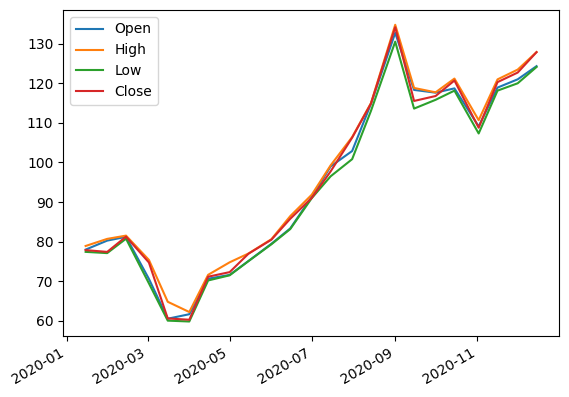

In [18]:
stockData.reindex(semiMonthsAdjusted).plot()

## How to use the resample() method

In [19]:
acresBurned = pd.read_pickle('acresBurned.pkl')
acresBurned.head(3)

,acres_burned
discovery_date,
1992-01-01,1280.76
1992-01-02,122.50
1992-01-03,526.00


In [20]:
acresBurned.resample(rule='ME').sum().head(3)

C:\Users\Scott\AppData\Local\Temp\ipykernel_18692\2177816106.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  acresBurned.resample(rule='M').sum().head(3)


,acres_burned
discovery_date,
1992-01-31,26779.35
1992-02-29,73605.86
1992-03-31,115644.53


In [21]:
acresBurned.resample(rule='12h').sum().head(4)

C:\Users\Scott\AppData\Local\Temp\ipykernel_18692\4213395181.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  acresBurned.resample(rule='12H').sum().head(4)


,acres_burned
discovery_date,
1992-01-01 00:00:00,1280.76
1992-01-01 12:00:00,0.00
1992-01-02 00:00:00,122.50
1992-01-02 12:00:00,0.00


## How to use the label and closed parameters when you downsample

In [22]:
acresBurned.head(3)

,acres_burned
discovery_date,
1992-01-01,1280.76
1992-01-02,122.50
1992-01-03,526.00


In [23]:
acresBurned.resample(rule='QE', label='right', closed='right').sum().head()

C:\Users\Scott\AppData\Local\Temp\ipykernel_18692\368008377.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  acresBurned.resample(rule='Q', label='right', closed='right').sum().head()


,acres_burned
discovery_date,
1992-03-31,216029.74
1992-06-30,485118.67
1992-09-30,1293714.71
1992-12-31,129026.79
1993-03-31,141047.95


In [24]:
acresBurned.resample(rule='QE', label='left', closed='left').sum().head()

C:\Users\Scott\AppData\Local\Temp\ipykernel_18692\3434693098.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  acresBurned.resample(rule='Q', label='left', closed='left').sum().head()


,acres_burned
discovery_date,
1991-12-31,213086.74
1992-03-31,487341.67
1992-06-30,1290628.71
1992-09-30,132765.79
1992-12-31,139471.71


## How downsampling can improve plots

In [25]:
stockData.head(2)

,Open,High,Low,Close
Date,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502
2020-01-03,74.287498,75.144997,74.125000,74.357498


<Axes: xlabel='Date'>

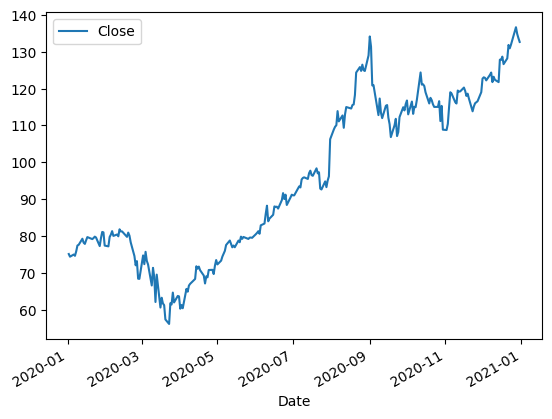

In [26]:
stockData.plot(y='Close')

<Axes: xlabel='Date'>

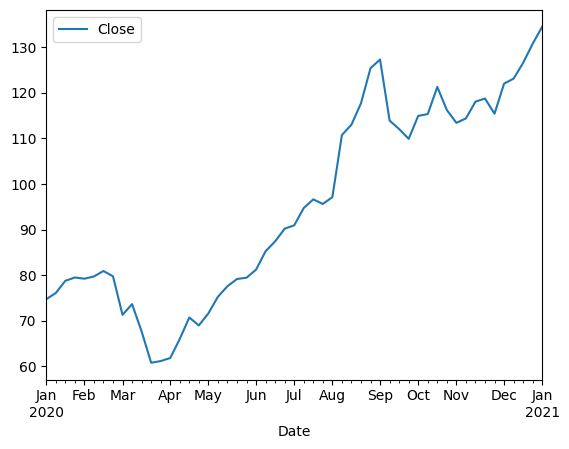

In [27]:
stockData.resample(rule='W').mean().plot(y='Close')

## The concept of rolling windows

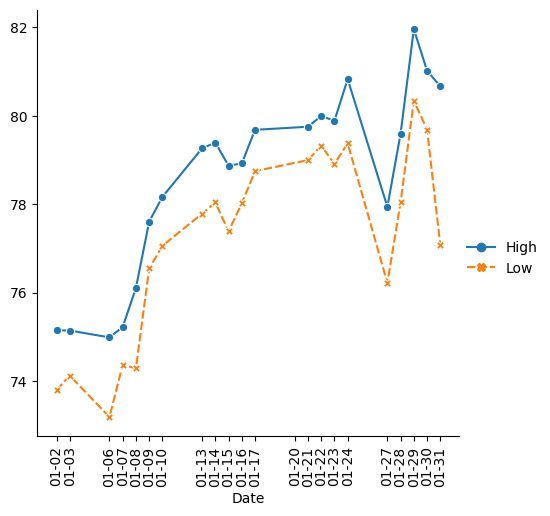

In [28]:
df = stockData[['High','Low']].query('Date <= "01/31/2020"')

g = sns.relplot(data=df, kind='line', markers=True)
for ax in g.axes.flat:
    ax.tick_params('x',labelrotation=90)
    ax.set_xticks(pd.date_range(start='01/02/2020', end='01/31/2020', 
                                freq='B'))
    ax.set_xticklabels(pd.date_range(start='01/02/2020', end='01/31/2020', 
                                     freq='B').strftime('%m-%d'))

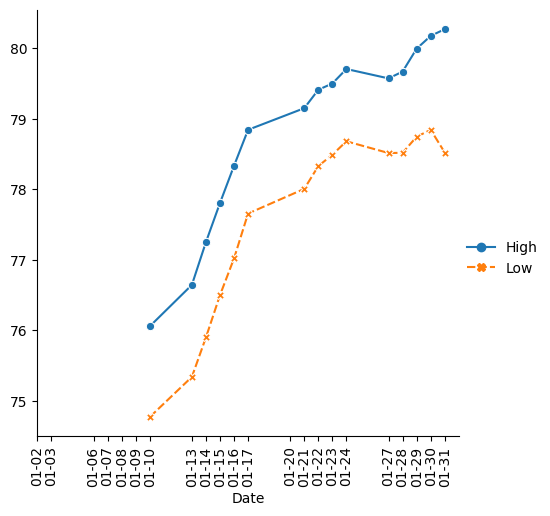

In [29]:
df = stockData[['High','Low']].query('Date <= "01/31/2020"') \
                              .rolling(window=7, min_periods=7).mean()

g = sns.relplot(data=df, kind='line', markers=True)
for ax in g.axes.flat:
    ax.tick_params('x',labelrotation=90)
    ax.set_xticks(pd.date_range(start='01/02/2020', end='01/31/2020', 
                                freq='B'))
    ax.set_xticklabels(pd.date_range(start='01/02/2020', end='01/31/2020', 
                                     freq='B').strftime('%m-%d'))

## How to create rolling windows

In [30]:
df = stockData[['High','Low']]. \
    query('Date <= "01/31/2020"').rolling(window=7).mean()
df.head(8)

,High,Low
Date,,
2020-01-02,NaN,NaN
2020-01-03,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,NaN,NaN
2020-01-09,NaN,NaN
2020-01-10,76.056428,74.768930
2020-01-13,76.644642,75.338929


In [31]:
df = stockData[['High','Low']]. \
    query('Date <= "01/31/2020"').rolling(window=7, min_periods=1).mean()
df.head(8)

,High,Low
Date,,
2020-01-02,75.150002,73.797501
2020-01-03,75.147500,73.961251
2020-01-06,75.094999,73.703334
2020-01-07,75.127499,73.870001
2020-01-08,75.323999,73.954001
2020-01-09,75.704582,74.386668
2020-01-10,76.056428,74.768930
2020-01-13,76.644642,75.338929


## How to plot rolling window data

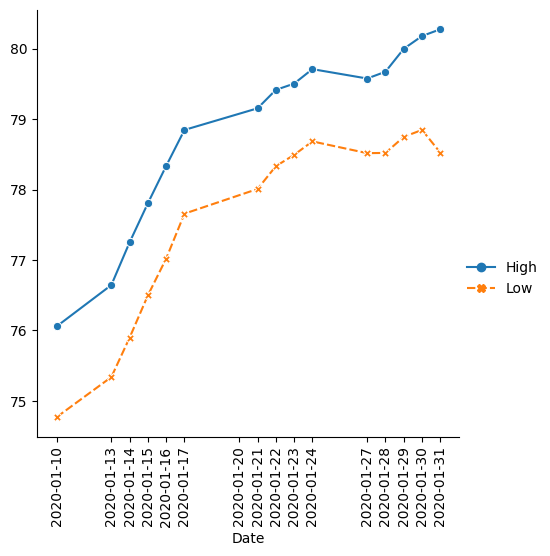

In [32]:
df = stockData[['High','Low']]. \
    query('Date <= "01/31/2020"').rolling(window=7, min_periods=7).mean()

g = sns.relplot(data=df, kind='line', markers=True)
for ax in g.axes.flat:
    ax.tick_params('x', labelrotation=90)
    ax.set_xticks(pd.date_range(start='01/10/2020', end='01/31/2020',
        freq='B'))
    ax.set_xticklabels(pd.date_range(start='01/10/2020', end='01/31/2020',
        freq='B').strftime('%Y-%m-%d'))

## How to create running totals

In [33]:
acresBurned = pd.read_pickle('acresBurned.pkl')
acresBurned.head()

,acres_burned
discovery_date,
1992-01-01,1280.76
1992-01-02,122.50
1992-01-03,526.00
1992-01-04,1150.13
1992-01-05,408.00


In [34]:
acresBurned['running_total'] = acresBurned.expanding().sum()
acresBurned.head()

,acres_burned,running_total
discovery_date,,
1992-01-01,1280.76,1280.76
1992-01-02,122.50,1403.26
1992-01-03,526.00,1929.26
1992-01-04,1150.13,3079.39
1992-01-05,408.00,3487.39


## How to plot the running totals

In [35]:
# get the first 10 days
acresBurned = acresBurned.head(10)

In [36]:
acresBurned = acresBurned.reset_index()
acresBurned.head(3)

,discovery_date,acres_burned,running_total
0,1992-01-01,1280.76,1280.76
1,1992-01-02,122.50,1403.26
2,1992-01-03,526.00,1929.26


In [37]:
acresMelted = pd.melt(acresBurned, id_vars='discovery_date', 
              value_vars=['acres_burned','running_total'], var_name='value_type')
acresMelted.head(3)

,discovery_date,value_type,value
0,1992-01-01,acres_burned,1280.76
1,1992-01-02,acres_burned,122.50
2,1992-01-03,acres_burned,526.00


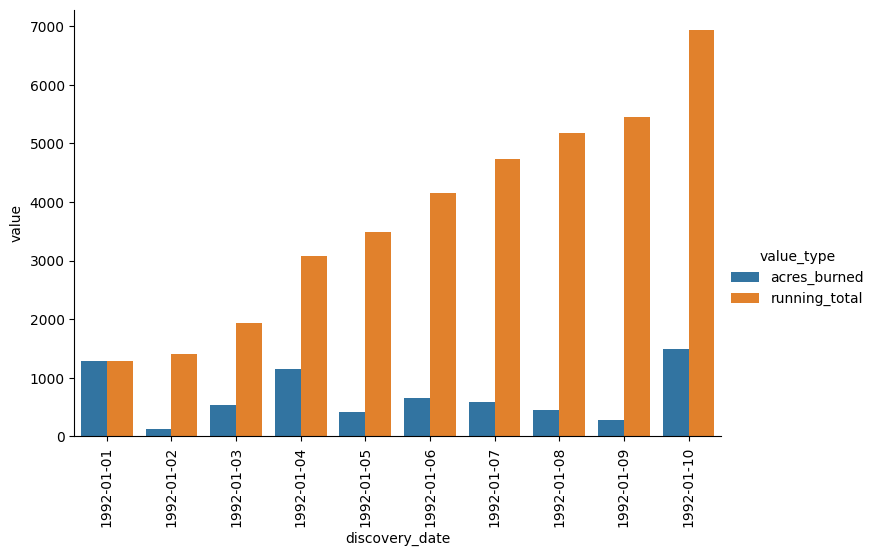

In [38]:
g = sns.catplot(data=acresMelted, kind='bar', 
                x='discovery_date', y='value', hue='value_type', aspect=1.5)
for ax in g.axes.flat:
    ax.tick_params('x', labelrotation=90)
    ax.set_xticks(acresMelted.discovery_date.drop_duplicates().astype(str))
    ax.set_xticklabels(acresMelted.discovery_date.drop_duplicates().astype(str))